In [66]:
#import packages 
import pandas as pd
import numpy as np
import re
import string
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

In [67]:
#downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
#downloading punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Process sentences function**

In [69]:
#process 
def process_sentences(sentence):
    stemmer=PorterStemmer()
    stopwords_english = stopwords.words('english') #stopwords english
    sentence = re.sub(r'\$\w*', '', sentence)
    sentence = re.sub(r'^RT[\s]+', '', sentence)
    sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', sentence)
    sentence = re.sub(r'#', '', sentence)
    

    sentence=sentence.lower()
    sentence_tokens=word_tokenize(sentence)
    sentences_clean=[]
    
    #removing stopwords, removing punctuation and then stemming the word
    for word in sentence_tokens:
        if (word not in stopwords_english and word not in string.punctuation):   
            stem_word=stemmer.stem(word)
            sentences_clean.append(stem_word)
          
    return sentences_clean

In [70]:
#loading the data
data=pd.read_csv('input_data_2.csv')
data.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [71]:
#converting type form object to string
data['Short description']=data['Short description'].astype(str)

**creating vocablory**

In [72]:
vocab_SD=[] #Short Description vocablory
for sentence in data['Short description']:
  for word in process_sentences(sentence):
    if word not in vocab_SD:
      vocab_SD.append(word)

In [73]:
print("vocab for Short Description length: ",len(vocab_SD))

vocab for Short Description length:  8292


**Processing Dataframe**

In [74]:
#short description sentence
sdesc_sentence=[]
for sentence in data['Short description']:
  sd_s=process_sentences(sentence)
  sdesc_sentence.append(sd_s)
data['S_description_p']=sdesc_sentence

In [75]:
data1=data[['Short description','Assignment group','S_description_p']]

In [76]:
data1.head()

,Short description,Assignment group,S_description_p
0,login issue,GRP_0,"[login, issu]"
1,outlook,GRP_0,[outlook]
2,cant log in to vpn,GRP_0,"[cant, log, vpn]"
3,unable to access hr_tool page,GRP_0,"[unabl, access, hr_tool, page]"
4,skype error,GRP_0,"[skype, error]"


**Tokenizing  and Pad Sequence**

In [77]:
#importing tokenizer and pad_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#S_description_p	x
tokenizer = Tokenizer(num_words=22640, split=' ') 
tokenizer.fit_on_texts(data1['S_description_p'].values)
x= tokenizer.texts_to_sequences(data1['S_description_p'])
x=pad_sequences(x)

**Encoding dependant varialbe**

In [78]:
y_hat=[]
for i in data1['Assignment group']:
  i=i[4:]
  y_hat.append(i)
#encoding the dependent variable

In [79]:
data1['Assignment group']=y_hat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
# y -- dependant variable
data1['Assignment group']=data1['Assignment group'].astype(float)
y=data1['Assignment group'].tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Labels**

In [116]:
#labels
data['Assignment group'].unique()


array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

**Train Test Split**

In [82]:
#creating training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,data1['Assignment group'], test_size = 0.10, random_state = 42)
import tensorflow as tf
X_train=tf.convert_to_tensor(X_train)
X_test=tf.convert_to_tensor(X_test)
y_train=tf.convert_to_tensor(Y_train)
y_test=tf.convert_to_tensor(Y_test)
print(X_train.shape,len(Y_train))
print(X_test.shape,len(Y_test))



(7650, 20) 7650
(850, 20) 850


**Model**

In [83]:
#model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,SpatialDropout1D
model = Sequential()
model.add(Embedding(input_dim=len(vocab_SD),output_dim=100,input_length=20))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 100)           829200    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 20, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 74)                7474      
Total params: 917,074
Trainable params: 917,074
Non-trainable params: 0
_________________________________________________________________


**Model Fitting**

In [84]:
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test,Y_test),callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/100
60/60 [==============================] - 11s 143ms/step - loss: 2.8929 - accuracy: 0.4593 - val_loss: 2.6429 - val_accuracy: 0.4306
Epoch 2/100
60/60 [==============================] - 8s 133ms/step - loss: 2.3818 - accuracy: 0.4893 - val_loss: 2.3756 - val_accuracy: 0.4871
Epoch 3/100
60/60 [==============================] - 8s 137ms/step - loss: 2.0605 - accuracy: 0.5486 - val_loss: 2.1670 - val_accuracy: 0.5094
Epoch 4/100
60/60 [==============================] - 8s 134ms/step - loss: 1.8675 - accuracy: 0.5733 - val_loss: 2.0405 - val_accuracy: 0.5271
Epoch 5/100
60/60 [==============================] - 8s 139ms/step - loss: 1.7074 - accuracy: 0.5983 - val_loss: 1.9468 - val_accuracy: 0.5541
Epoch 6/100
60/60 [==============================] - 8s 136ms/step - loss: 1.5524 - accuracy: 0.6295 - val_loss: 1.8960 - val_accuracy: 0.5718
Epoch 7/100
60/60 [==============================] - 8s 136ms/step - loss: 1.4130 - accuracy: 0.6651 - val_loss: 1.8420 - val_accuracy: 0.571

**Loss**

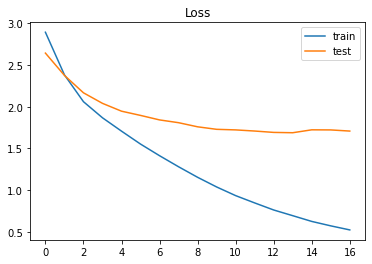

In [85]:
#loss
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

**Accuracy**

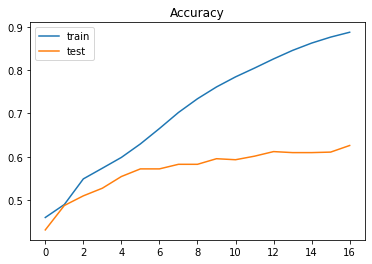

In [86]:
#accuracy
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


**Predict function**

In [111]:
labels=['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73']

def predict_function():
  input1=input("Enter complient: ")
  complient=[input1]
  y_pred = tokenizer.texts_to_sequences(complient)
  y_pred = pad_sequences(y_pred)
  y_pred = model.predict(y_pred)
  

  print("predicted class:",labels[np.argmax(y_pred)])


In [110]:
model.save('model_fc_lstm.h5')

**Testing**

In [112]:
predict_function()

Enter complient: when undocking pc , screen will not come back
predicted class: GRP_4


In [113]:
predict_function()

Enter complient: emails not coming in from zz mail
predicted class: GRP_9


In [114]:
predict_function()

Enter complient: machine não está funcionando
predicted class: GRP_62
